## Synonyms don't exist

A simple study in why they aren't real, at least not really.

In [1]:
from random import binomialvariate

import matplotlib
import matplotlib.pyplot    as plt
import numpy                as np

In [2]:
TRIES = 250
N = 1_000
P_A = 0.5
MAX_STEPS = 100_000

In [3]:
prob_average_steps = {}

for n in [10, 100, 1_000, 2_500, 10_000]:
    probs = np.ones((TRIES, MAX_STEPS + 1))
    last_i = np.ones(TRIES)
    probs[:, 0] = 0.5
    for iter in range(TRIES):
        P_A = 0.5
        for i in range(1, MAX_STEPS):
            P_A = binomialvariate(n, P_A) / n
            probs[iter, i] = P_A
            if P_A == 0 or P_A == 1.0:
                if P_A == 0:
                    probs[iter] = 1 - probs[iter ]
                    probs[iter, i:] = 1
                last_i[iter] = i
                break
    prob_average_steps[n] = np.mean(probs, axis=0)[:int(np.max(last_i))+2]

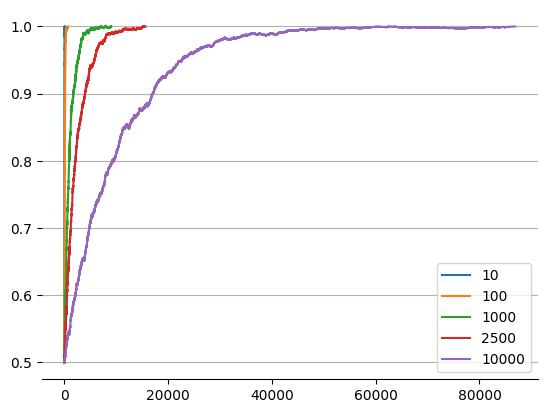

In [4]:
ax = plt.subplot()
ax.spines[['left', 'right', 'top']].set_visible(False)
ax.yaxis.grid()

for n, vals in prob_average_steps.items():
    ax.plot(vals, label=n)

ax.legend()
